# Equivalent Inertia of Renewable Penetrated Systems

In this demo, we will discuss the equivalent inertia calculation of renewable penetrated systems.

References:

1. Q. Shi, F. Li and H. Cui, "Analytical Method to Aggregate Multi-Machine SFR Model With Applications in Power System Dynamic Studies," in IEEE Transactions on Power Systems, vol. 33, no. 6, pp. 6355-6367, Nov. 2018, doi: 10.1109/TPWRS.2018.2824823.
1. U. Markovic, Z. Chu, P. Aristidou and G. Hug, "LQR-Based Adaptive Virtual Synchronous Machine for Power Systems With High Inverter Penetration," in IEEE Transactions on Sustainable Energy, vol. 10, no. 3, pp. 1501-1512, July 2019, doi: 10.1109/TSTE.2018.2887147.

> ⚠️ **Warning:** This content may be misleading and is currently under investigation. 

> *— Jinning Wang, 2025-08-12*

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scienceplots

import andes

andes.__version__

'1.9.3'

In [3]:
%matplotlib inline

In [4]:
andes.config_logger(stream_level=50)

## Case Preparation

case0: base case, all five generators are synchronous generators (SG)

case1: replace one SG with a grid forming inverter (GFM), with zero ``kw``

case2: based on case1, with equivalent ``kw``

case3: replace one SG with a grid following inverter (GFL)

case4: replace one SG with a "negative" load

case5: based on case3, increase the GFL's p0

case6: replace one SG with a GFL, with doubled ``Sn``

case7: replace one SG with a GFL and a GFM, with equal ``Sn``

case8: based on case7, set GFM's ``M`` and ``D`` to almost zero

In [5]:
case_file = andes.get_case('ieee14/ieee14_full.xlsx')

# case0: base case
s0 = andes.load(case_file,
                setup=False, no_output=True)

syg5 = 'GENROU_5'
stg5 = s0.GENROU.get(src='gen', attr='v', idx=syg5)
bus5 = s0.GENROU.get(src='bus', attr='v', idx=syg5)
Sn5 = s0.GENROU.get(src='Sn', attr='v', idx=syg5)
p05 = s0.StaticGen.get(src='p0', attr='v', idx=stg5)
tg5 = s0.TGOV1.find_idx(keys='syn', values=[syg5])[0]
R5 = s0.TGOV1.get(src='R', attr='v', idx=tg5)

# case1: note that `kw` is equivalent to `1/R`, and here we turn it off
s1 = andes.load(case_file,
                setup=False, no_output=True)
s1.add(model='REGCV1',
       param_dict=dict(bus=bus5, gen=stg5, Sn=Sn5,
                       M=s1.GENROU.get(src='M', attr='v', idx=syg5),
                       D=s1.GENROU.get(src='D', attr='v', idx=syg5),
                       kw=0, kv=0))
s1.SynGen.alter(src='u', idx=syg5, value=0)

# case2
s2 = andes.load(case_file,
                setup=False, no_output=True)
s2.add(model='REGCV1',
       param_dict=dict(bus=bus5, gen=stg5, Sn=Sn5,
                       M=s2.GENROU.get(src='M', attr='v', idx=syg5),
                       D=s2.GENROU.get(src='D', attr='v', idx=syg5),
                       kw=1/R5, kv=0))
s2.SynGen.alter(src='u', idx=syg5, value=0)

# case3
s3 = andes.load(case_file,
                setup=False, no_output=True)
s3.add(model='REGCP1',
       param_dict=dict(bus=bus5, gen=stg5, Sn=Sn5))
s3.SynGen.alter(src='u', idx=syg5, value=0)

# case4
s4 = andes.load(case_file,
                setup=False, no_output=True)
s4.add(model='PQ',
       param_dict=dict(bus=bus5, p0=-p05, q0=0))
s4.SynGen.alter(src='u', idx=syg5, value=0)

# case5
s5 = andes.load(case_file,
                setup=False, no_output=True)
s5.add(model='REGCP1',
       param_dict=dict(bus=bus5, gen=stg5, Sn=Sn5))
s5.SynGen.alter(src='u', idx=syg5, value=0)
s5.StaticGen.set(src='p0', attr='v', idx=stg5, value=p05+0.5)

# case6
s6 = andes.load(case_file,
                setup=False, no_output=True)
s6.add(model='REGCP1',
       param_dict=dict(bus=bus5, gen=stg5, Sn=Sn5))
s6.SynGen.alter(src='u', idx=syg5, value=0)

# case7
s7 = andes.load(case_file,
                setup=False, no_output=True)
s7.add(model='REGCV1',
       param_dict=dict(bus=bus5, gen=stg5, Sn=Sn5,
                       gammap=0.5, gammaq=0.5,
                       M=s1.GENROU.get(src='M', attr='v', idx=syg5),
                       D=s1.GENROU.get(src='D', attr='v', idx=syg5),
                       kw=0, kv=0))
s7.add(model='REGCP1',
       param_dict=dict(bus=bus5, gen=stg5, Sn=Sn5,
                       gammap=0.5, gammaq=0.5))

s7.SynGen.alter(src='u', idx=syg5, value=0)

# case8
s8 = andes.load(case_file,
                setup=False, no_output=True)
s8.add(model='REGCV1',
       param_dict=dict(bus=bus5, gen=stg5, Sn=Sn5,
                       gammap=0.5, gammaq=0.5,
                       M=0.001*s1.GENROU.get(src='M', attr='v', idx=syg5),
                       D=0.001*s1.GENROU.get(src='D', attr='v', idx=syg5),
                       kw=0, kv=0))
s8.add(model='REGCP1',
       param_dict=dict(bus=bus5, gen=stg5, Sn=Sn5,
                       gammap=0.5, gammaq=0.5))
s8.SynGen.alter(src='u', idx=syg5, value=0)

True

In [6]:
for i, ss in enumerate([s0, s1, s2, s3, s4, s5, s6, s7, s8]):
    print(f"case{i}")
    ss.add(model='BusROCOF', param_dict=dict(bus=1, Tr=0.5))

    ss.add(model='Alter', param_dict=dict(t=1, model='PQ', dev='PQ_1', src='Ppf',
                                          attr='v', method='+', amount=0.4))

    ss.PQ.config.p2p = 1
    ss.PQ.config.q2q = 1
    ss.PQ.config.p2z = 0
    ss.PQ.config.q2z = 0

    # turn off under-voltage PQ-to-Z conversion
    ss.PQ.pq2z = 0

    ss.setup()

    ss.PFlow.run()

    ss.TGOV1.alter(src='VMIN', idx=ss.TGOV1.idx.v, value=-10)

    ss.TDS.config.criteria = 0
    ss.TDS.config.tf = 15
    ss.TDS.config.no_tqdm = True

    _ = ss.TDS.init()

    ss.TDS.run()

    if ss.exit_code != 0:
        print(f"Case s{i} failed!")

case0
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.617 at t=1. Previous value was 0.217.
case1
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.617 at t=1. Previous value was 0.217.
case2
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.617 at t=1. Previous value was 0.217.
case3
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.617 at t=1. Previous value was 0.217.
case4
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.617 at t=1. Previous value was 0.217.
case5
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.617 at t=1. Previous value was 0.217.
case6
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.617 at t=1. Previous value was 0.217.
case7
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.617 at t=1. Previous value was 0.217.
case8
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.617 at t=1. Previous value was 0.217.


## Inertia Calculation

Eq (1): $ M_{\text{sys}} = \frac{\sum (M_i \cdot S_i + M_{f} \cdot S_{f})}{\sum S_i + \sum S_f} $ **PROBLEMATIC!**

Eq (2): $ M_{\text{sys}} = \frac{\sum (M_i \cdot S_i + M_{f} \cdot S_{f})}{\sum S_i} $

<!-- case0: $ M_{\text{sys}} = \frac{\sum (M_i \cdot S_i)}{\sum S_i} $

case1 and case2: $ M_{\text{sys}} = \frac{\sum (M_i \cdot S_i + M_{f} \cdot S_{f})}{\sum S_i + \sum S_f} $

case3, case4, case5, and case6: $ M_{\text{sys}} = \frac{\sum (M_i \cdot S_i)}{\sum S_i} $

case7: $ M_{\text{sys}} = \frac{\sum (M_i \cdot S_i + M_{f} \cdot S_{f})}{\sum S_i + \sum S_f} $ -->

where $M_i$ is the inertia of SG, $M_f$ is the inertia of GFM, $S_i$ is the apparent power of SG, and $S_f$ is the apparent power of GFM.

where $i$ denotes SG, and $f$ denotes GFM.



In [7]:
def eq1(ss):
    num = np.sum(ss.GENROU.M.vin * ss.GENROU.Sn.v) + np.sum(ss.REGCV1.M.vin * ss.REGCV1.Sn.v)
    den = np.sum(ss.GENROU.Sn.v.sum() + ss.REGCV1.Sn.v.sum())
    return num / den

def eq2(ss):
    num = np.sum(ss.GENROU.M.vin * ss.GENROU.Sn.v) + np.sum(ss.REGCV1.M.vin * ss.REGCV1.Sn.v)
    den = ss.GENROU.Sn.v.sum()
    return num / den

for i in range(9):
    globals()[f'M{i}_eq1'] = eq1(globals()[f's{i}'])
    globals()[f'M{i}_eq2'] = eq2(globals()[f's{i}'])

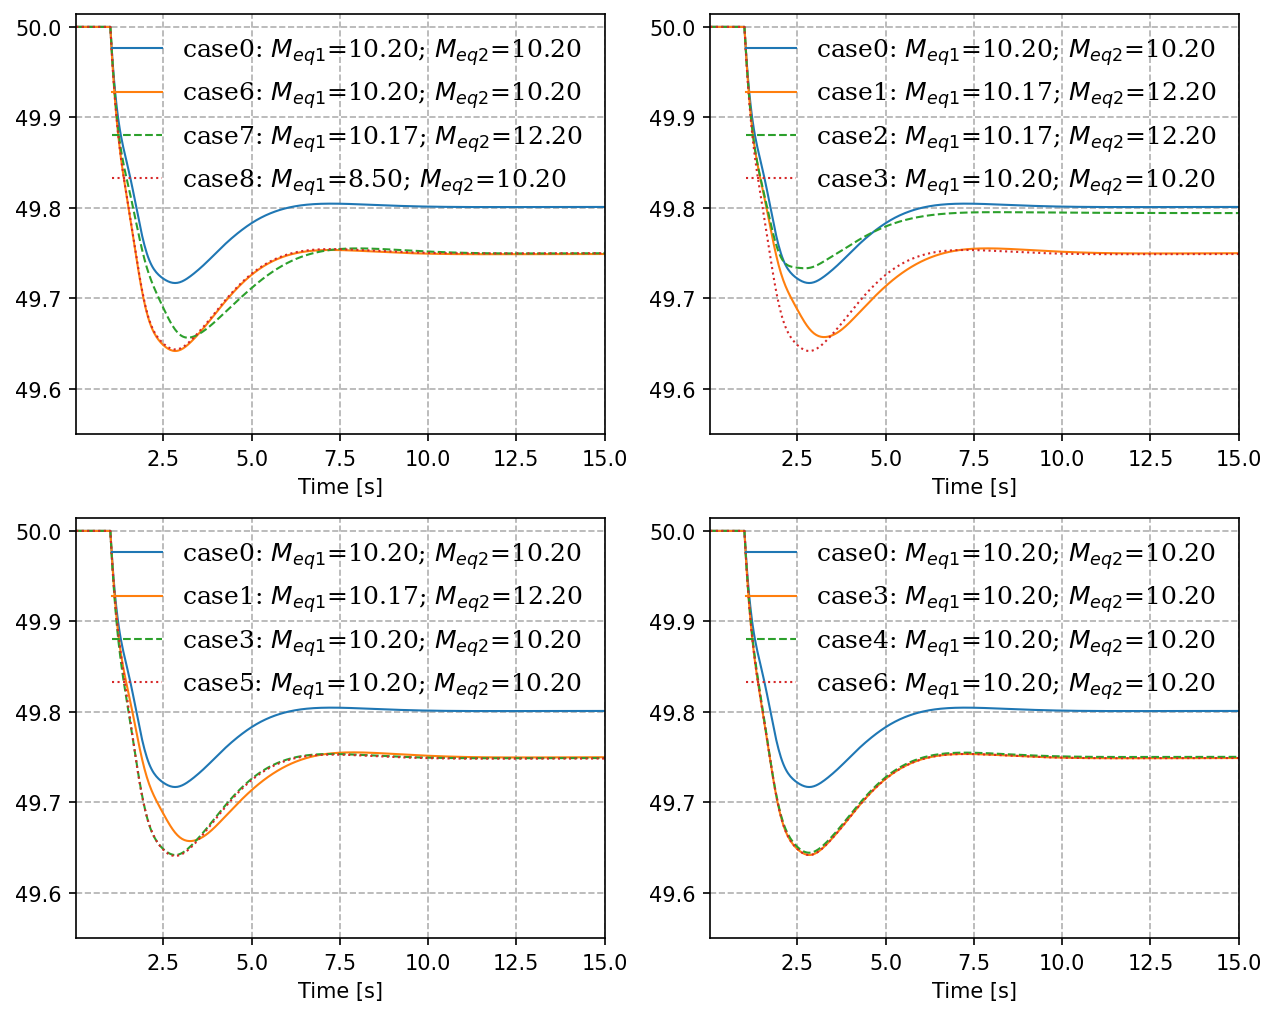

In [18]:
plt.style.use(['ieee', 'default'])

a = (0,)
right = 15
ymin, ymax =49.75, 50.02

linestyles = ['-', '-', '--', ':']
grid_settings = [False, False, False, True]
loc_settings = [None, None, None, 'upper right']
frameon_settings = [False, False, False, True]
right_settings = [None, None, None, right]
ymin_settings = [None, None, None, 49.55]

fig, ax = plt.subplots(2, 2, figsize=(10, 8), dpi=150)

cases = [0, 6, 7, 8]
for i, case in enumerate(cases):
    s = globals()[f's{case}']
    yheader = [f'case{case}: $M_{{eq1}}$={globals()[f"M{case}_eq1"]:.2f}; $M_{{eq2}}$={globals()[f"M{case}_eq2"]:.2f}']
    s.TDS.plt.plot(s.GENROU.omega, a=a,
                   ytimes=s.config.freq,
                   yheader=yheader,
                   linestyles=[linestyles[i]],
                   ax=ax[0, 0], fig=fig,
                   grid=grid_settings[i], loc=loc_settings[i],
                   frameon=frameon_settings[i], right=right_settings[i],
                   ymin=ymin_settings[i], show=False)

cases = [0, 1, 2, 3]
for i, case in enumerate(cases):
    s = globals()[f's{case}']
    yheader = [f'case{case}: $M_{{eq1}}$={globals()[f"M{case}_eq1"]:.2f}; $M_{{eq2}}$={globals()[f"M{case}_eq2"]:.2f}']
    s.TDS.plt.plot(s.GENROU.omega, a=a,
                   ytimes=s.config.freq,
                   yheader=yheader,
                   linestyles=[linestyles[i]],
                   ax=ax[0, 1], fig=fig,
                   grid=grid_settings[i], loc=loc_settings[i],
                   frameon=frameon_settings[i], right=right_settings[i],
                   ymin=ymin_settings[i], show=False)

cases = [0, 1, 3, 5]
for i, case in enumerate(cases):
    s = globals()[f's{case}']
    yheader = [f'case{case}: $M_{{eq1}}$={globals()[f"M{case}_eq1"]:.2f}; $M_{{eq2}}$={globals()[f"M{case}_eq2"]:.2f}']
    s.TDS.plt.plot(s.GENROU.omega, a=a,
                   ytimes=s.config.freq,
                   yheader=yheader,
                   linestyles=[linestyles[i]],
                   ax=ax[1, 0], fig=fig,
                   grid=grid_settings[i], loc=loc_settings[i],
                   frameon=frameon_settings[i], right=right_settings[i],
                   ymin=ymin_settings[i], show=False)

cases = [0, 3, 4, 6]
for i, case in enumerate(cases):
    s = globals()[f's{case}']
    yheader = [f'case{case}: $M_{{eq1}}$={globals()[f"M{case}_eq1"]:.2f}; $M_{{eq2}}$={globals()[f"M{case}_eq2"]:.2f}']
    s.TDS.plt.plot(s.GENROU.omega, a=a,
                   ytimes=s.config.freq,
                   yheader=yheader,
                   linestyles=[linestyles[i]],
                   ax=ax[1, 1], fig=fig,
                   grid=grid_settings[i], loc=loc_settings[i],
                   frameon=frameon_settings[i], right=right_settings[i],
                   ymin=ymin_settings[i], show=False)

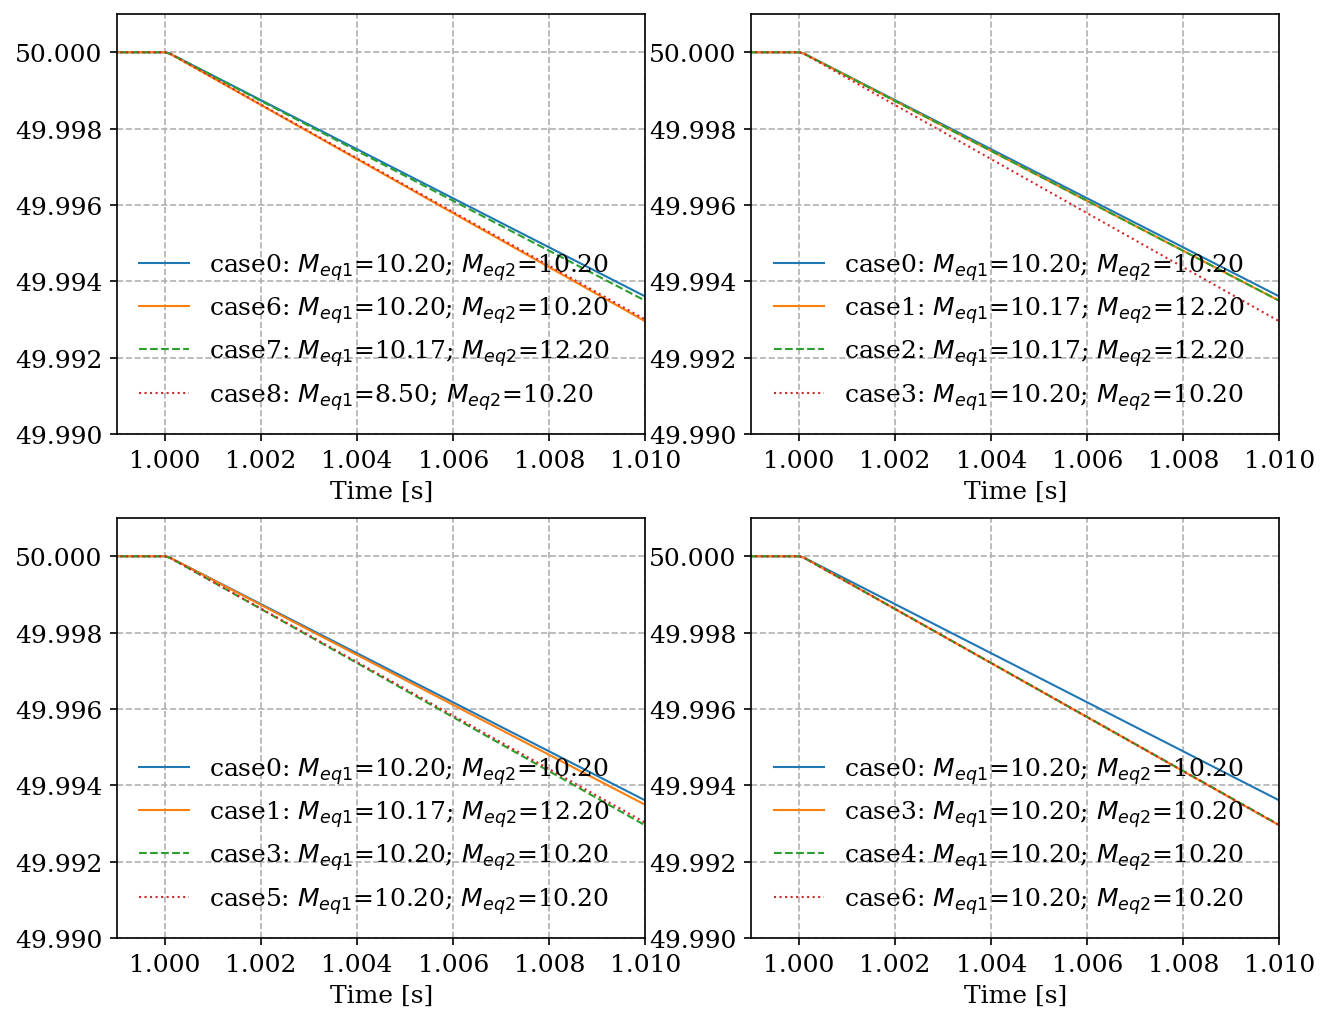

In [19]:
right = 1.01
right_settings = [None, None, None, right]
left=0.999
left_settings = [None, None, None, left]
ymin_settings = [None, None, None, 49.99]
ymax_settings = [None, None, None, 50.001]
loc_settings = [None, None, None, 'lower right']

fig1, ax1 = plt.subplots(2, 2, figsize=(10, 8), dpi=150)
cases = [0, 6, 7, 8]
for i, case in enumerate(cases):
    s = globals()[f's{case}']
    yheader = [f'case{case}: $M_{{eq1}}$={globals()[f"M{case}_eq1"]:.2f}; $M_{{eq2}}$={globals()[f"M{case}_eq2"]:.2f}']
    s.TDS.plt.plot(s.GENROU.omega, a=a,
                   ytimes=s.config.freq,
                   yheader=yheader,
                   linestyles=[linestyles[i]],
                   ax=ax1[0, 0], fig=fig1,
                   grid=grid_settings[i], loc=loc_settings[i],
                   frameon=frameon_settings[i], right=right_settings[i],
                   left=left_settings[i],
                   ymax=ymax_settings[i],
                   ymin=ymin_settings[i], show=False)

cases = [0, 1, 2, 3]
for i, case in enumerate(cases):
    s = globals()[f's{case}']
    yheader = [f'case{case}: $M_{{eq1}}$={globals()[f"M{case}_eq1"]:.2f}; $M_{{eq2}}$={globals()[f"M{case}_eq2"]:.2f}']
    s.TDS.plt.plot(s.GENROU.omega, a=a,
                   ytimes=s.config.freq,
                   yheader=yheader,
                   linestyles=[linestyles[i]],
                   ax=ax1[0, 1], fig=fig1,
                   grid=grid_settings[i], loc=loc_settings[i],
                   frameon=frameon_settings[i], right=right_settings[i],
                   left=left_settings[i],
                   ymax=ymax_settings[i],
                   ymin=ymin_settings[i], show=False)

cases = [0, 1, 3, 5]
for i, case in enumerate(cases):
    s = globals()[f's{case}']
    yheader = [f'case{case}: $M_{{eq1}}$={globals()[f"M{case}_eq1"]:.2f}; $M_{{eq2}}$={globals()[f"M{case}_eq2"]:.2f}']
    s.TDS.plt.plot(s.GENROU.omega, a=a,
                   ytimes=s.config.freq,
                   yheader=yheader,
                   linestyles=[linestyles[i]],
                   ax=ax1[1, 0], fig=fig1,
                   grid=grid_settings[i], loc=loc_settings[i],
                   frameon=frameon_settings[i], right=right_settings[i],
                   left=left_settings[i],
                   ymax=ymax_settings[i],
                   ymin=ymin_settings[i], show=False)

cases = [0, 3, 4, 6]
for i, case in enumerate(cases):
    s = globals()[f's{case}']
    yheader = [f'case{case}: $M_{{eq1}}$={globals()[f"M{case}_eq1"]:.2f}; $M_{{eq2}}$={globals()[f"M{case}_eq2"]:.2f}']
    s.TDS.plt.plot(s.GENROU.omega, a=a,
                   ytimes=s.config.freq,
                   yheader=yheader,
                   linestyles=[linestyles[i]],
                   ax=ax1[1, 1], fig=fig1,
                   grid=grid_settings[i], loc=loc_settings[i],
                   frameon=frameon_settings[i], right=right_settings[i],
                   left=left_settings[i],
                   ymax=ymax_settings[i],
                   ymin=ymin_settings[i], show=False)

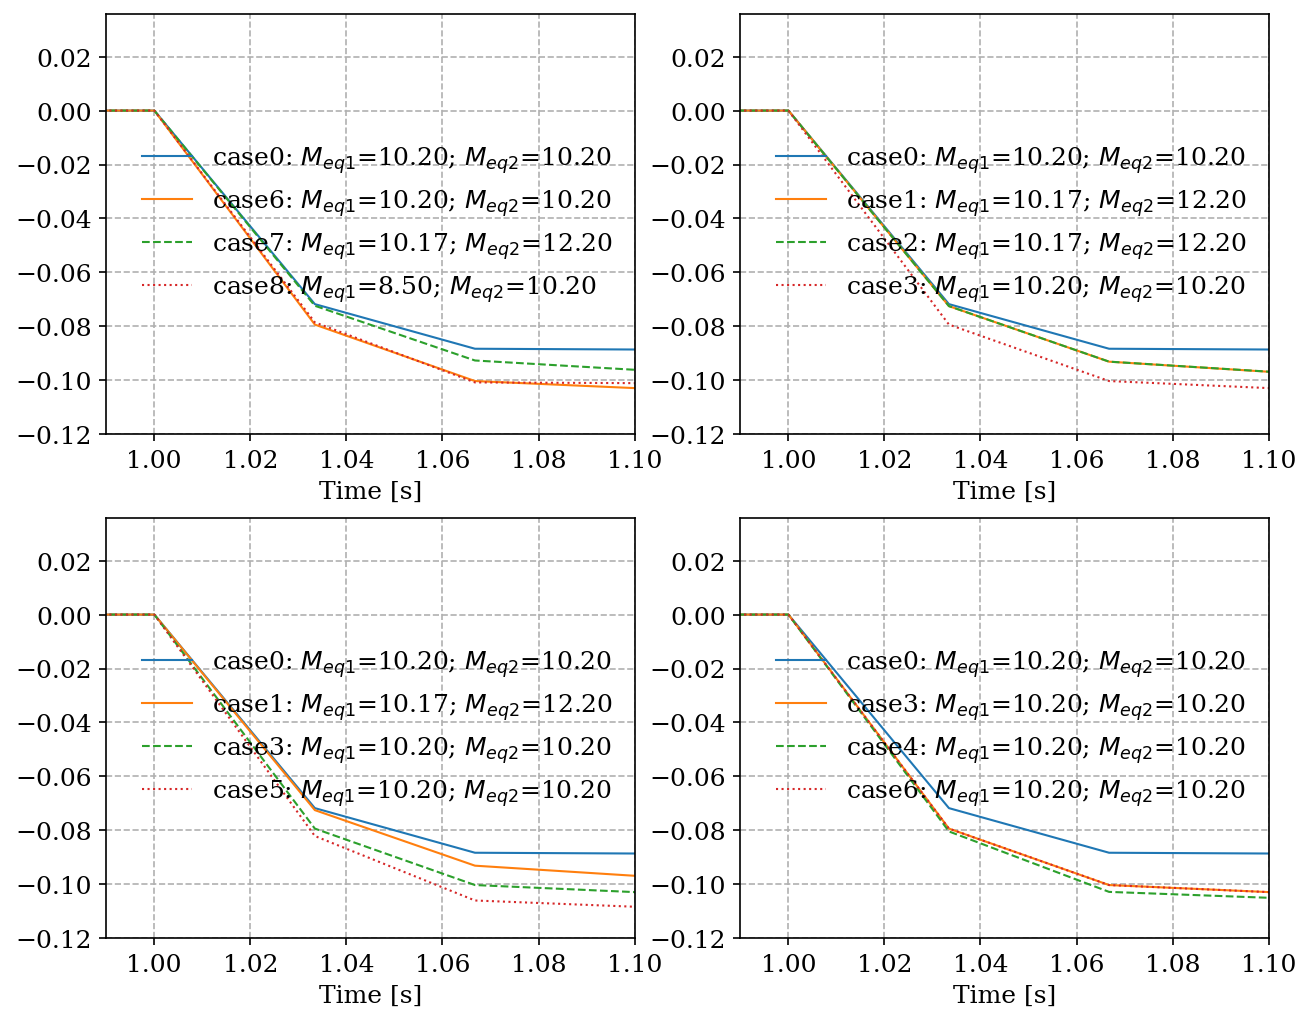

In [14]:
left=0.99
right = 1.1
right_settings = [None, None, None, right]
left_settings = [None, None, None, left]
loc_settings = [None, None, None, 'lower right']
ymin_settings = [None, None, None, -0.12]

fig2, ax2 = plt.subplots(2, 2, figsize=(10, 8), dpi=150)
cases = [0, 6, 7, 8]
for i, case in enumerate(cases):
    s = globals()[f's{case}']
    yheader = [f'case{case}: $M_{{eq1}}$={globals()[f"M{case}_eq1"]:.2f}; $M_{{eq2}}$={globals()[f"M{case}_eq2"]:.2f}']
    s.TDS.plt.plot(s.BusROCOF.Wf_y, a=a,
                   ytimes=s.config.freq,
                   yheader=yheader,
                   linestyles=[linestyles[i]],
                   ax=ax2[0, 0], fig=fig2,
                   grid=grid_settings[i], loc=loc_settings[i],
                   frameon=frameon_settings[i], right=right_settings[i],
                   left=left_settings[i],
                   ymin=ymin_settings[i], show=False)

cases = [0, 1, 2, 3]
for i, case in enumerate(cases):
    s = globals()[f's{case}']
    yheader = [f'case{case}: $M_{{eq1}}$={globals()[f"M{case}_eq1"]:.2f}; $M_{{eq2}}$={globals()[f"M{case}_eq2"]:.2f}']
    s.TDS.plt.plot(s.BusROCOF.Wf_y, a=a,
                   ytimes=s.config.freq,
                   yheader=yheader,
                   linestyles=[linestyles[i]],
                   ax=ax2[0, 1], fig=fig2,
                   grid=grid_settings[i], loc=loc_settings[i],
                   frameon=frameon_settings[i], right=right_settings[i],
                   left=left_settings[i],
                   ymin=ymin_settings[i], show=False)

cases = [0, 1, 3, 5]
for i, case in enumerate(cases):
    s = globals()[f's{case}']
    yheader = [f'case{case}: $M_{{eq1}}$={globals()[f"M{case}_eq1"]:.2f}; $M_{{eq2}}$={globals()[f"M{case}_eq2"]:.2f}']
    s.TDS.plt.plot(s.BusROCOF.Wf_y, a=a,
                   ytimes=s.config.freq,
                   yheader=yheader,
                   linestyles=[linestyles[i]],
                   ax=ax2[1, 0], fig=fig2,
                   grid=grid_settings[i], loc=loc_settings[i],
                   frameon=frameon_settings[i], right=right_settings[i],
                   left=left_settings[i],
                   ymin=ymin_settings[i], show=False)

cases = [0, 3, 4, 6]
for i, case in enumerate(cases):
    s = globals()[f's{case}']
    yheader = [f'case{case}: $M_{{eq1}}$={globals()[f"M{case}_eq1"]:.2f}; $M_{{eq2}}$={globals()[f"M{case}_eq2"]:.2f}']
    s.TDS.plt.plot(s.BusROCOF.Wf_y, a=a,
                   ytimes=s.config.freq,
                   yheader=yheader,
                   linestyles=[linestyles[i]],
                   ax=ax2[1, 1], fig=fig2,
                   grid=grid_settings[i], loc=loc_settings[i],
                   frameon=frameon_settings[i], right=right_settings[i],
                   left=left_settings[i],
                   ymin=ymin_settings[i], show=False)

In [15]:
basefreq

NameError: name 'basefreq' is not defined

In [16]:
cols = ['omega GENROU 1', 'omega GENROU 2']

omega = pd.DataFrame()
omega['Time'] = s0.dae.ts.df_xy.index

for i in range(9):
    print(f"case{i}, M_eq1={globals()[f'M{i}_eq1']:.2f}, M_eq2={globals()[f'M{i}_eq2']:.2f}")
    basefreq = globals()[f's{i}'].config.freq
    omega[f'case{i}'] = basefreq * globals()[f's{i}'].dae.ts.df_xy['omega GENROU 1'].values

omega.iloc[30:40]

case0, M_eq1=10.20, M_eq2=10.20
case1, M_eq1=10.17, M_eq2=12.20
case2, M_eq1=10.17, M_eq2=12.20
case3, M_eq1=10.20, M_eq2=10.20
case4, M_eq1=10.20, M_eq2=10.20
case5, M_eq1=10.20, M_eq2=10.20
case6, M_eq1=10.20, M_eq2=10.20
case7, M_eq1=10.17, M_eq2=12.20
case8, M_eq1=8.50, M_eq2=10.20


,Time,case0,case1,case2,case3,case4,case5,case6,case7,case8
30,1.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
31,1.000100,49.999966,49.999966,49.999966,49.999963,49.999962,49.999961,49.999963,49.999966,49.999966
32,1.033433,49.978543,49.978156,49.978157,49.976353,49.976389,49.976595,49.976353,49.978167,49.976510
33,1.066767,49.959831,49.957788,49.957792,49.954989,49.955753,49.956801,49.954989,49.957832,49.954817
34,1.100100,49.943503,49.939226,49.939241,49.935887,49.937220,49.939066,49.935887,49.939306,49.936170
35,1.133433,49.929145,49.922583,49.922618,49.918717,49.920557,49.923143,49.918717,49.922690,49.918560
36,1.166767,49.916515,49.907788,49.907855,49.903255,49.905595,49.908845,49.903255,49.907927,49.903492
37,1.200100,49.905434,49.894703,49.894814,49.889329,49.892162,49.895960,49.889329,49.894888,49.889376
38,1.233433,49.895733,49.883169,49.883342,49.876776,49.880062,49.884253,49.876776,49.883429,49.876904
39,1.266767,49.887229,49.873013,49.873266,49.865420,49.869084,49.873486,49.865420,49.873381,49.865761
